<a href="https://colab.research.google.com/github/SiyuFang/STAT6289/blob/master/HW2_Fang_Siyu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (a)

In [15]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import os


In [2]:
batch_size = 32
num_classes = 10
epochs = 10
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

In [3]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170500096/170498071 [==============================] - 6s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [4]:
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

#model
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


In [5]:
#model 1
model1 = Sequential()

model1.add(Flatten())
model1.add(Dense(num_classes))
model1.add(Activation('softmax'))

In [6]:
#model 2
model2 = Sequential()
model2.add(Flatten())

model2.add(Dense(512,input_shape=x_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(Dropout(0.5))

model2.add(Dense(num_classes))
model2.add(Activation('softmax'))

In [7]:
#Model 3
model3 = Sequential()
model3.add(Flatten())

model3.add(Dense(512,input_shape=x_train.shape[1:]))
model3.add(Activation('relu'))
model3.add(Dropout(0.5))

model3.add(Dense(512))
model3.add(Activation('relu'))
model3.add(Dropout(0.5))

model3.add(Dense(num_classes))
model3.add(Activation('softmax'))

In [8]:
#model 4
model4 = Sequential()
model4.add(Flatten())

model4.add(Dense(512,input_shape=x_train.shape[1:]))
model4.add(Activation('relu'))
model4.add(Dropout(0.5))

model4.add(Dense(512))
model4.add(Activation('relu'))
model4.add(Dropout(0.5))

model4.add(Dense(512))
model4.add(Activation('relu'))
model4.add(Dropout(0.5))

model4.add(Dense(num_classes))
model4.add(Activation('softmax'))

In [9]:
#model 5
model5 = Sequential()
model5.add(Flatten())

model5.add(Dense(512,input_shape=x_train.shape[1:]))
model5.add(Activation('relu'))
model5.add(Dropout(0.5))

model5.add(Dense(512))
model5.add(Activation('relu'))
model5.add(Dropout(0.5))

model5.add(Dense(512))
model5.add(Activation('relu'))
model5.add(Dropout(0.5))

model5.add(Dense(512))
model5.add(Activation('relu'))
model5.add(Dropout(0.5))

model5.add(Dense(num_classes))
model5.add(Activation('softmax'))

In [10]:
# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

In [11]:
# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
model1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
model2.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
model3.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
model4.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
model5.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
       # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    history=model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)
    history1=model1.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)  
    history2=model2.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)  
    history3=model3.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)
    history4=model4.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)
    history5=model5.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

Using real-time data augmentation.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.8595 - accuracy: 0.3178 - val_loss: 1.7706 - val_accuracy: 0.3708
Epoch 2/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.5851 - accuracy: 0.4233 - val_loss: 1.5315 - val_accuracy: 0.4542
Epoch 3/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.4691 - accuracy: 0.4683 - val_loss: 1.3459 - val_accuracy: 0.5256
Epoch 4/10
1563/1563 [==============================] - 32s 20ms/step - loss: 1.3896 - accuracy: 0.4986 - val_loss: 1.2597 - val_accuracy: 0.5474
Epoch 5/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.3240 - accuracy: 0.5260 - val_loss: 1.2188 - val_accuracy: 0.5692
Epoch 6/10
1563/1563 [==============================] - 32s 20ms/step - loss: 1.2702 - accuracy: 0.5469 - val_loss: 1.0983 - val_accuracy: 0.6128
Epoch 7/10
15

In [12]:
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /content/saved_models/keras_cifar10_trained_model.h5 


In [13]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 1s 3ms/step - loss: 1.0151 - accuracy: 0.6436
Test loss: 1.015108346939087
Test accuracy: 0.6435999870300293


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


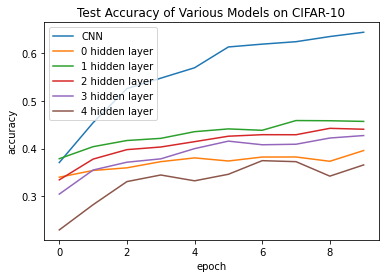

In [16]:
# list all data in history
print(history.history.keys())
print(history1.history.keys())
print(history2.history.keys())
print(history3.history.keys())
print(history4.history.keys())
print(history5.history.keys())

# summarize history for accuracy
plt.plot(history.history['val_accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('Test Accuracy of Various Models on CIFAR-10')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['CNN','0 hidden layer','1 hidden layer','2 hidden layer','3 hidden layer','4 hidden layer','5 hidden layer'], loc='upper left')
plt.show()

According to the plot, the convolutional network has the best test accuracy result and the simple dense neural networks with 4 hidden layers has the worse test accuracy result. From the graph, we can see as we increse the number of dense hidden layers, the optimation is worse and worse, except the 0 dense hidden layers. It's because the convolutional network distributes shared weights, and it simplifies the optimation.But when we increase the number of dense hidden layers, the optimation becomes more difficulte and fails to find the best weight.

# (b)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Not using data augmentation.
Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8273 - accuracy: 0.3329 - val_loss: 1.6655 - val_accuracy: 0.3948
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5340 - accuracy: 0.4473 - val_loss: 1.3709 - val_accuracy: 0.5078
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3935 - accuracy: 0.4998 - val_loss: 1.2979 - val_accuracy: 0.5393
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2991 - accuracy: 0.5371 - val_loss: 1.1716 - val_accuracy: 0.5819
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2241 - accuracy: 0.5674 - val_loss: 1.1273 - val_accuracy: 0.6051
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1595 - accuracy: 0.5891 - val_loss: 1.0645 - val_accuracy: 0.6219
Epoch 7/10
1563/1563 [============

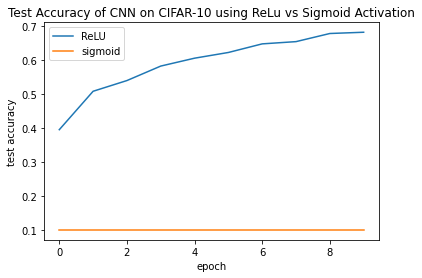

In [17]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import os

batch_size = 32
num_classes = 10
epochs = 10
data_augmentation = False
data1_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

#Model
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

#model 1
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model1.add(Activation('sigmoid'))
model1.add(Conv2D(32, (3, 3)))
model1.add(Activation('sigmoid'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

model1.add(Conv2D(64, (3, 3), padding='same'))
model1.add(Activation('sigmoid'))
model1.add(Conv2D(64, (3, 3)))
model1.add(Activation('sigmoid'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

model1.add(Flatten())
model1.add(Activation('sigmoid'))
model1.add(Dropout(0.5))
model1.add(Dense(num_classes))
model1.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
model1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    history = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        shuffle=True)
    history1 = model1.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
            featurewise_center=False,  # set input mean to 0 over the dataset
            samplewise_center=False,  # set each sample mean to 0
            featurewise_std_normalization=False,  # divide inputs by std of the dataset
            samplewise_std_normalization=False,  # divide each input by its std
            zca_whitening=False,  # apply ZCA whitening
            zca_epsilon=1e-06,  # epsilon for ZCA whitening
            rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
            # randomly shift images horizontally (fraction of total width)
            width_shift_range=0.1,
            # randomly shift images vertically (fraction of total height)
            height_shift_range=0.1,
            shear_range=0.,  # set range for random shear
            zoom_range=0.,  # set range for random zoom
            channel_shift_range=0.,  # set range for random channel shifts
            # set mode for filling points outside the input boundaries
            fill_mode='nearest',
            cval=0.,  # value used for fill_mode = "constant"
            horizontal_flip=True,  # randomly flip images
            vertical_flip=False,  # randomly flip images
            # set rescaling factor (applied before any other transformation)
            rescale=None,
            # set function that will be applied on each input
            preprocessing_function=None,
            # image data format, either "channels_first" or "channels_last"
            data_format=None,
            # fraction of images reserved for validation (strictly between 0 and 1)
            validation_split=0.0)
    
    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    history = model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)
    history1 = model1.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)
    
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# list all data in history
print(history.history.keys())
print(history1.history.keys())

# summarize history for test accuracy
plt.plot(history.history['val_accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Test Accuracy of CNN on CIFAR-10 using ReLu vs Sigmoid Activation')
plt.ylabel('test accuracy')
plt.xlabel('epoch')
plt.legend(['ReLU','sigmoid'], loc='upper left')
plt.show()

The rectified linear units has much better accuracy results than the sigmoid units. The lack of improvement in the first few epochs of the sigmoid units might be due to the fact that the starting point is in one of the tails of the sigmoid whose gradient is near 0.

# (c)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Not using data augmentation.
Epoch 1/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8022 - accuracy: 0.3413 - val_loss: 1.5139 - val_accuracy: 0.4468
Epoch 2/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4867 - accuracy: 0.4603 - val_loss: 1.3703 - val_accuracy: 0.5149
Epoch 3/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3517 - accuracy: 0.5133 - val_loss: 1.2303 - val_accuracy: 0.5675
Epoch 4/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2585 - accuracy: 0.5525 - val_loss: 1.1581 - val_accuracy: 0.5916
Epoch 5/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1793 - accuracy: 0.5838 - val_loss: 1.0953 - val_accuracy: 0.6127
Epoch 6/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1127 - accuracy: 0.6090 - val_loss: 1.0288 - val_accuracy: 0.6443
Epoch 7/100
1563/1563 [=====

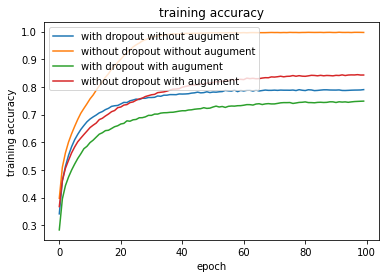

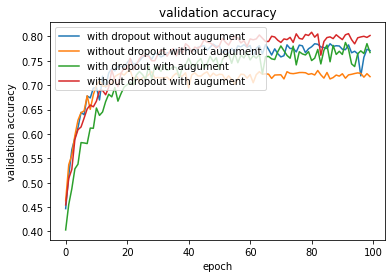

In [33]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import os

batch_size = 32
num_classes = 10
epochs = 100
data_augmentation = False
data1_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

#Model
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

#model 1
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model1.add(Activation('relu'))
model1.add(Conv2D(32, (3, 3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

model1.add(Conv2D(64, (3, 3), padding='same'))
model1.add(Activation('relu'))
model1.add(Conv2D(64, (3, 3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

model1.add(Flatten())
model1.add(Dense(512))
model1.add(Activation('relu'))
model1.add(Dropout(0.5))
model1.add(Dense(num_classes))
model1.add(Activation('softmax'))

#model 2
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(Conv2D(32, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(64, (3, 3), padding='same'))
model2.add(Activation('relu'))
model2.add(Conv2D(64, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())
model2.add(Dense(512))
model2.add(Activation('relu'))
model2.add(Dense(num_classes))
model2.add(Activation('softmax'))

#model 3
model3 = Sequential()
model3.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model3.add(Activation('relu'))
model3.add(Conv2D(32, (3, 3)))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(64, (3, 3), padding='same'))
model3.add(Activation('relu'))
model3.add(Conv2D(64, (3, 3)))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Flatten())
model3.add(Dense(512))
model3.add(Activation('relu'))
model3.add(Dense(num_classes))
model3.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
model1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
model2.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
model3.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    history = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        shuffle=True)
    history2 = model2.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        shuffle=True)
else:
  print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
  datagen = ImageDataGenerator(
            featurewise_center=False,  # set input mean to 0 over the dataset
            samplewise_center=False,  # set each sample mean to 0
            featurewise_std_normalization=False,  # divide inputs by std of the dataset
            samplewise_std_normalization=False,  # divide each input by its std
            zca_whitening=False,  # apply ZCA whitening
            zca_epsilon=1e-06,  # epsilon for ZCA whitening
            rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
            # randomly shift images horizontally (fraction of total width)
            width_shift_range=0.1,
            # randomly shift images vertically (fraction of total height)
            height_shift_range=0.1,
            shear_range=0.,  # set range for random shear
            zoom_range=0.,  # set range for random zoom
            channel_shift_range=0.,  # set range for random channel shifts
            # set mode for filling points outside the input boundaries
            fill_mode='nearest',
            cval=0.,  # value used for fill_mode = "constant"
            horizontal_flip=True,  # randomly flip images
            vertical_flip=False,  # randomly flip images
            # set rescaling factor (applied before any other transformation)
            rescale=None,
            # set function that will be applied on each input
            preprocessing_function=None,
            # image data format, either "channels_first" or "channels_last"
            data_format=None,
            # fraction of images reserved for validation (strictly between 0 and 1)
            validation_split=0.0)
    
  # Compute quantities required for feature-wise normalization
  # (std, mean, and principal components if ZCA whitening is applied).
  datagen.fit(x_train)

  # Fit the model on the batches generated by datagen.flow().
  history = model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)
  history2 = model2.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)
    
if not data1_augmentation:
   history1 = model1.fit(x_train, y_train,
                          batch_size=batch_size,
                          epochs=epochs,
                          alidation_data=(x_test, y_test),
                          shuffle=True)
   history3 = model3.fit(x_train, y_train,
                          batch_size=batch_size,
                          epochs=epochs,
                          alidation_data=(x_test, y_test),
                          shuffle=True)
    
else:
  print('Using real-time data augmentation.')
  # This will do preprocessing and realtime data augmentation:
  datagen = ImageDataGenerator(
          featurewise_center=False,  # set input mean to 0 over the dataset
          samplewise_center=False,  # set each sample mean to 0
          featurewise_std_normalization=False,  # divide inputs by std of the dataset
          samplewise_std_normalization=False,  # divide each input by its std
          zca_whitening=False,  # apply ZCA whitening
          zca_epsilon=1e-06,  # epsilon for ZCA whitening
          rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
          # randomly shift images horizontally (fraction of total width)
          width_shift_range=0.1,
          # randomly shift images vertically (fraction of total height)
          height_shift_range=0.1,
          shear_range=0.,  # set range for random shear
          zoom_range=0.,  # set range for random zoom
          channel_shift_range=0.,  # set range for random channel shifts
          # set mode for filling points outside the input boundaries
          fill_mode='nearest',
          cval=0.,  # value used for fill_mode = "constant"
          horizontal_flip=True,  # randomly flip images
          vertical_flip=False,  # randomly flip images
          # set rescaling factor (applied before any other transformation)
          rescale=None,
          # set function that will be applied on each input
          preprocessing_function=None,
          # image data format, either "channels_first" or "channels_last"
          data_format=None,
          # fraction of images reserved for validation (strictly between 0 and 1)
          validation_split=0.0)
    
  # Compute quantities required for feature-wise normalization
  # (std, mean, and principal components if ZCA whitening is applied).
  datagen.fit(x_train)

  # Fit the model on the batches generated by datagen.flow().
  history1 = model1.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                      epochs=epochs,
                      validation_data=(x_test, y_test),
                      workers=4)
  history3 = model3.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                      epochs=epochs,
                      validation_data=(x_test, y_test),
                      workers=4)
    
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# list all data in history
print(history.history.keys())
print(history1.history.keys())
print(history2.history.keys())
print(history3.history.keys())

# summarize history for training accuracy
plt.plot(history.history['accuracy'])
plt.plot(history2.history['accuracy'])
plt.plot(history1.history['accuracy'])
plt.plot(history3.history['accuracy'])
plt.title('training accuracy')
plt.ylabel('training accuracy')
plt.xlabel('epoch')
plt.legend(['with dropout without augument','without dropout without augument','with dropout with augument','without dropout with augument'], loc='upper left')
plt.show()

# summarize history for test accuracy
plt.plot(history.history['val_accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('validation accuracy')
plt.ylabel('validation accuracy')
plt.xlabel('epoch')
plt.legend(['with dropout without augument','without dropout without augument','with dropout with augument','without dropout with augument'], loc='upper left')
plt.show()

From the two graphs, we can see the one without dropout and without augmentation learns the fastest but overfits the most. Data augmentation helps tremendously to improve generalization. Dropout
helps to improve generalization when there is no data augmentation, but it worsens the results when there is data
augmentation.